<a href="https://colab.research.google.com/github/jvataidee/pdi_python/blob/main/mosaic_images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criando Mosaico de Imagens

In [ ]:
!pip install spectral
!pip install rasterio

In [366]:
import numpy as np
import cv2
import rasterio as rio
from spectral import imshow
import tifffile as tif
from rasterio.merge import merge
from rasterio.plot import show
import matplotlib.pyplot as plt
from pathlib import Path

## Gerando duas imagens

In [394]:
# Lendo multiespectral
src1 = rio.open('/content/drive/MyDrive/pdi_python/21 - PDI com Python/02 - Transformações Espectrais e Espaciais/mult.tif')
b1 = src1.read(1)
b2 = src1.read(2)
b3 = src1.read(3)
b4 = src1.read(4)

In [412]:
img1 = np.dstack([b1, b2, b3, b4])[100:250, 0:250, :4]
img2 = np.dstack([b1, b2, b3, b4])[100:250, 250:500, :4]

In [413]:
print(img1.shape, img2.shape)

(150, 250, 4) (150, 250, 4)


In [414]:
img1_normalized = img1 / 255.0
img2_normalized = img2 / 255.0

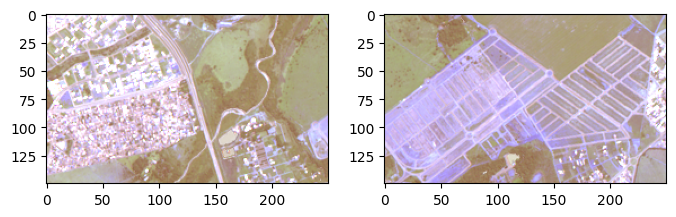

In [415]:
# Visualização das imagens separadas
fig, ax = plt.subplots(1,2, figsize = (8,6))
ax[0].imshow(img1_normalized)
ax[1].imshow(img2_normalized);

In [416]:
# Salvar as imagens normalizadas em arquivos temporários
with rio.open('img1.tif', 'w', **src1.profile) as dst1:
    dst1.write(img1_normalized.transpose(2, 0, 1))

with rio.open('img2.tif', 'w', **src1.profile) as dst2:
    dst2.write(img2_normalized.transpose(2, 0, 1))

In [417]:
# Abrir os arquivos temporários como datasets rasterio
src_img1 = rio.open('img1.tif')
src_img2 = rio.open('img2.tif')

## Fazendo Merge de duas imagens

In [441]:
raster_files  = ['img1.tif', 'img2.tif']

raster_to_mosiac = []
for p in raster_files:
    raster = rio.open(p)
    raster_to_mosiac.append(raster)

In [442]:
# Merge das imagens recortadas
mosaic, output = merge(raster_to_mosiac)

In [443]:
mosaic.shape

(4, 635, 700)

In [444]:
output

Affine(8.0, 0.0, 720664.0,
       0.0, -8.0, 8197738.0)

In [445]:
with rio.open('mosaic1.tif', 'w', **src1.profile) as dst1:
    dst1.write(mosaic)

In [450]:
with rio.open('mosaic1.tif')as src:
    array = src.read()

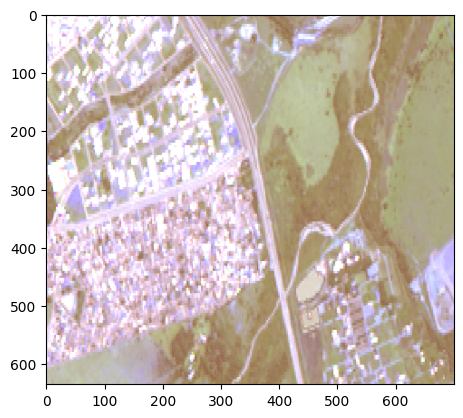

In [451]:
plt.imshow(array.transpose(1,2,0));